In [1]:
%matplotlib notebook

import common
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:brown', \
           'tab:grey', 'tab:olive', 'tab:cyan', 'lime', 'navy', 'fuchsia', 'm']

## Triadic Census
Note that the triadic census for the groups (such as *socialism + Libertarian*) were obtained by generating a network with all nodes/edges in the included subreddits; not simply by combining the triadic censes of the individual subreddits.

In [2]:
dims = pd.read_csv('dimensions.csv',index_col=0).apply(pd.eval)
df = pd.read_csv('results/reddit_reply.csv',index_col=0)

# without 003
dims_omit = dims.drop('003', axis=0)
df_omit = df.drop('003', axis=1)

## Weighted Average (003)
Note that compared to other subreddits, *politics* had by far the most nodes and edges.

<IPython.core.display.Javascript object>


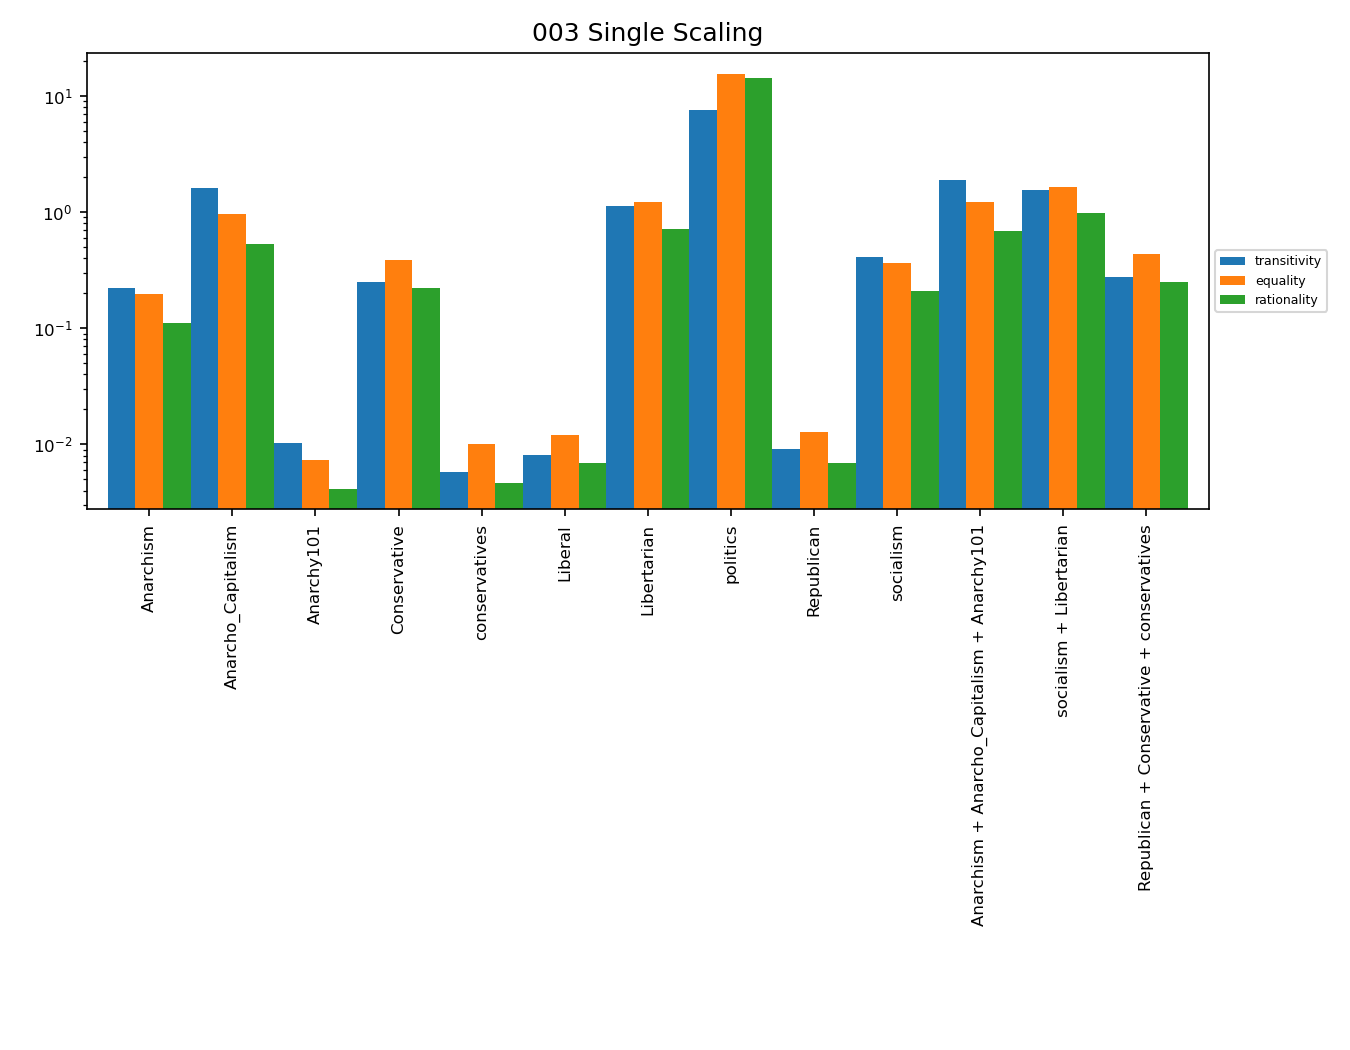

<IPython.core.display.Javascript object>


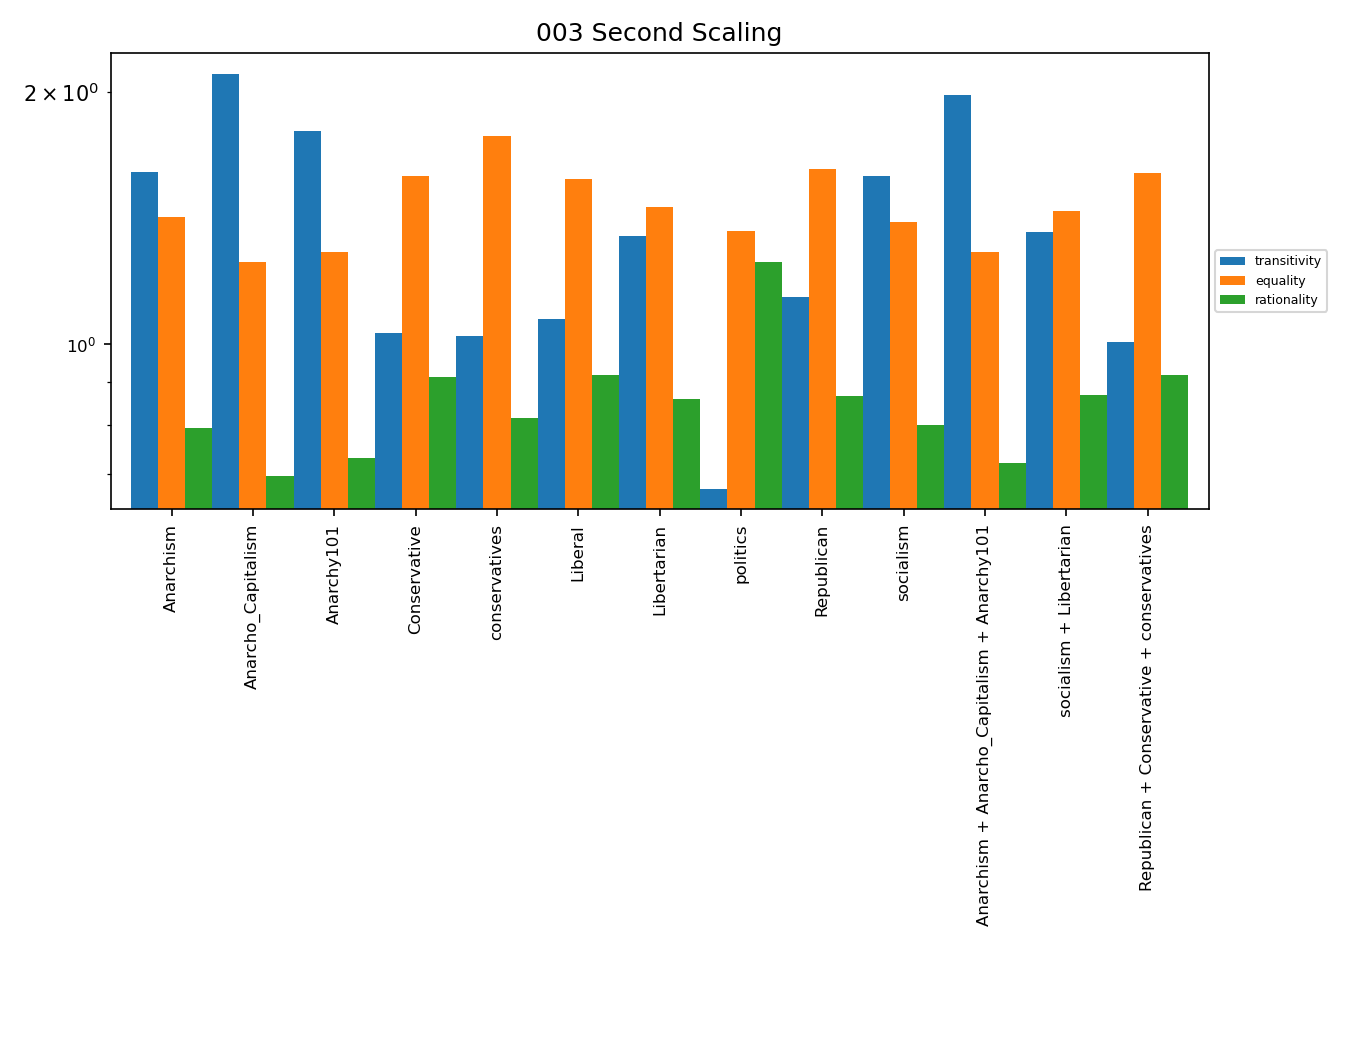

In [3]:
scaling = df.divide(df.sum(axis=0), axis=1)
scaled = scaling.dot(dims)
average = scaling.divide(scaling.sum(axis=1), axis=0).dot(dims)
# first scaling: politics 003 / politics 003 + anarchism 003 + ... + liberals 003
# second scaling: politics 003 / politics 003 + politics 021 + ... + politics 300 (weighted average)

common.plot_df(scaled, '003 Single Scaling', (9,7))
common.plot_df(average, '003 Second Scaling', (9,7))

<IPython.core.display.Javascript object>


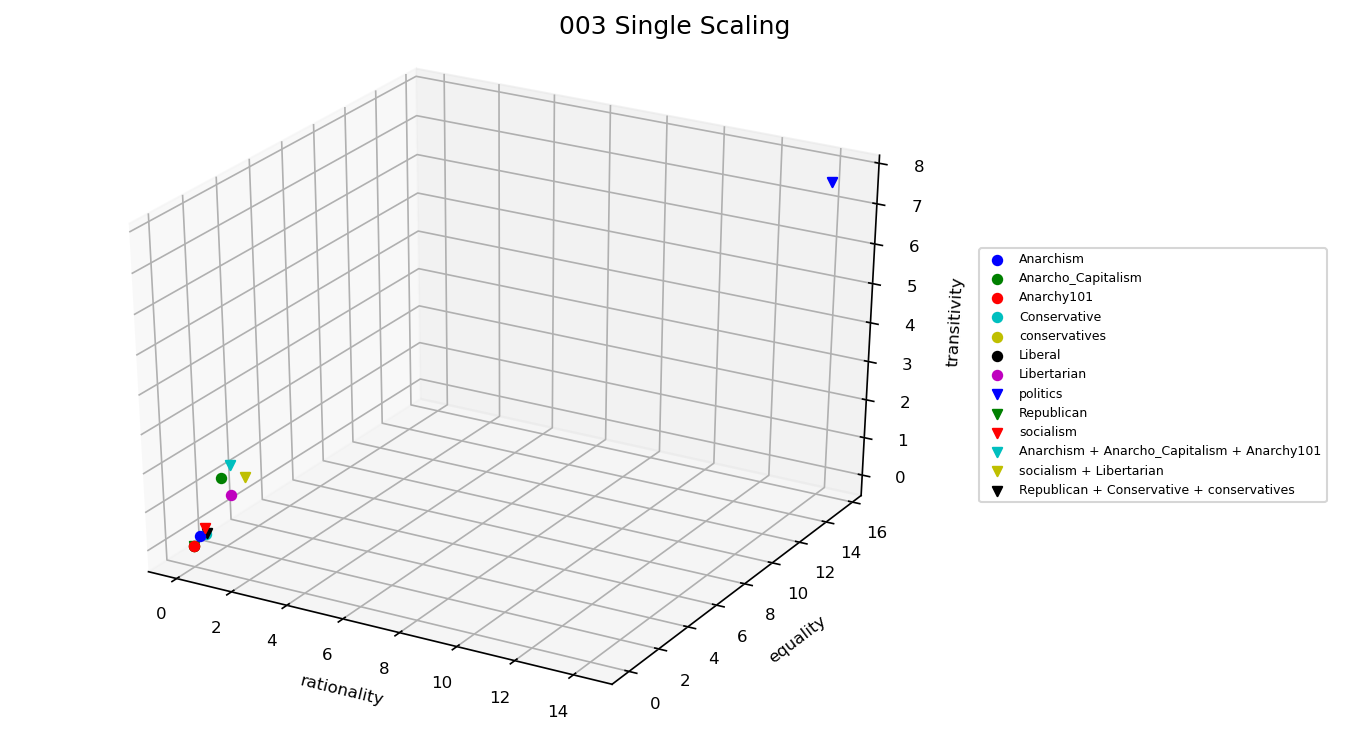

<IPython.core.display.Javascript object>


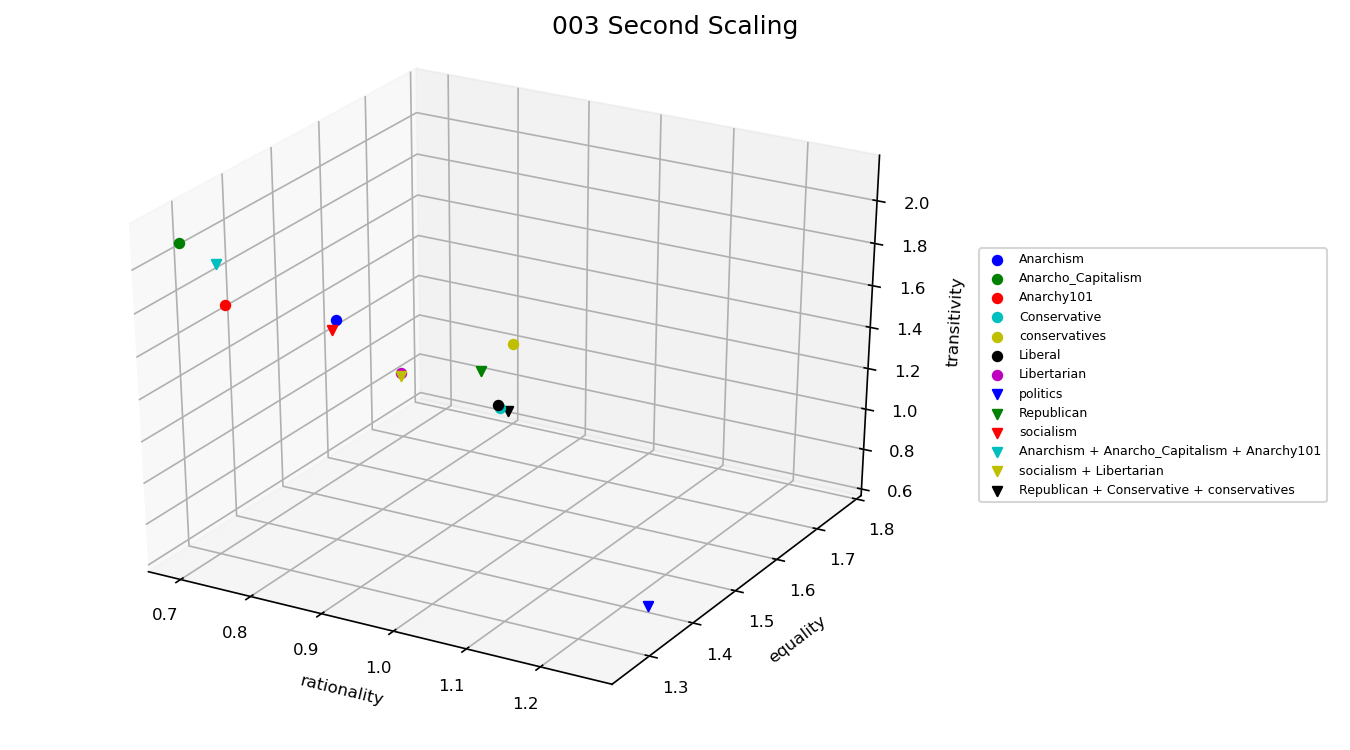

In [4]:
common.plot_3d(scaled, '003 Single Scaling', 'rationality', 'equality', 'transitivity')
common.plot_3d(average, '003 Second Scaling', 'rationality', 'equality', 'transitivity')

## Weighted Average (No 003)

<IPython.core.display.Javascript object>


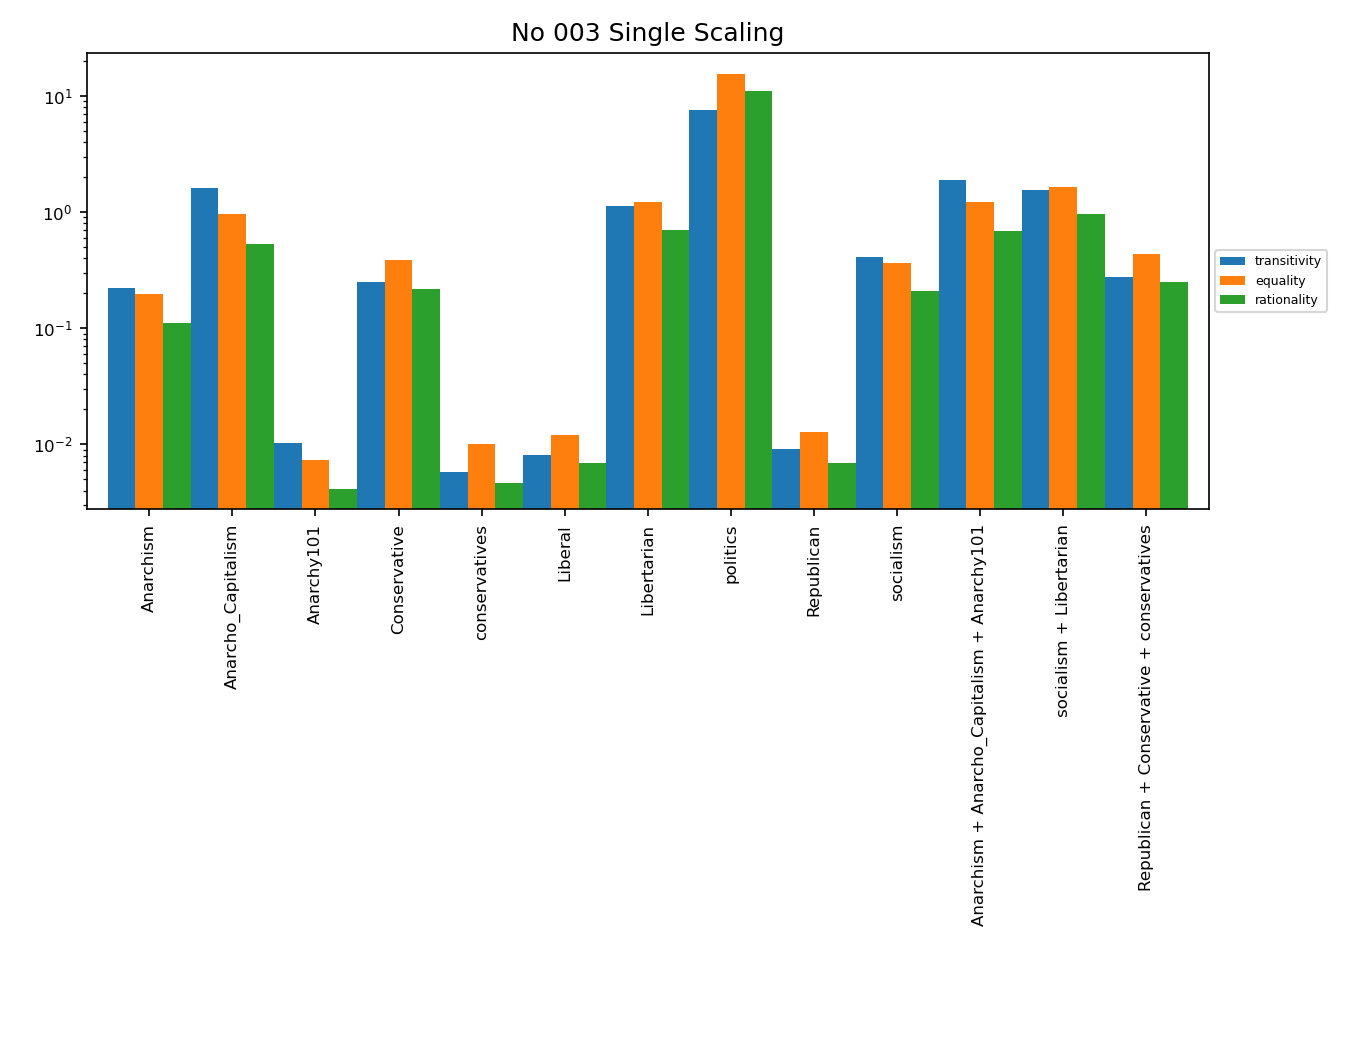

<IPython.core.display.Javascript object>


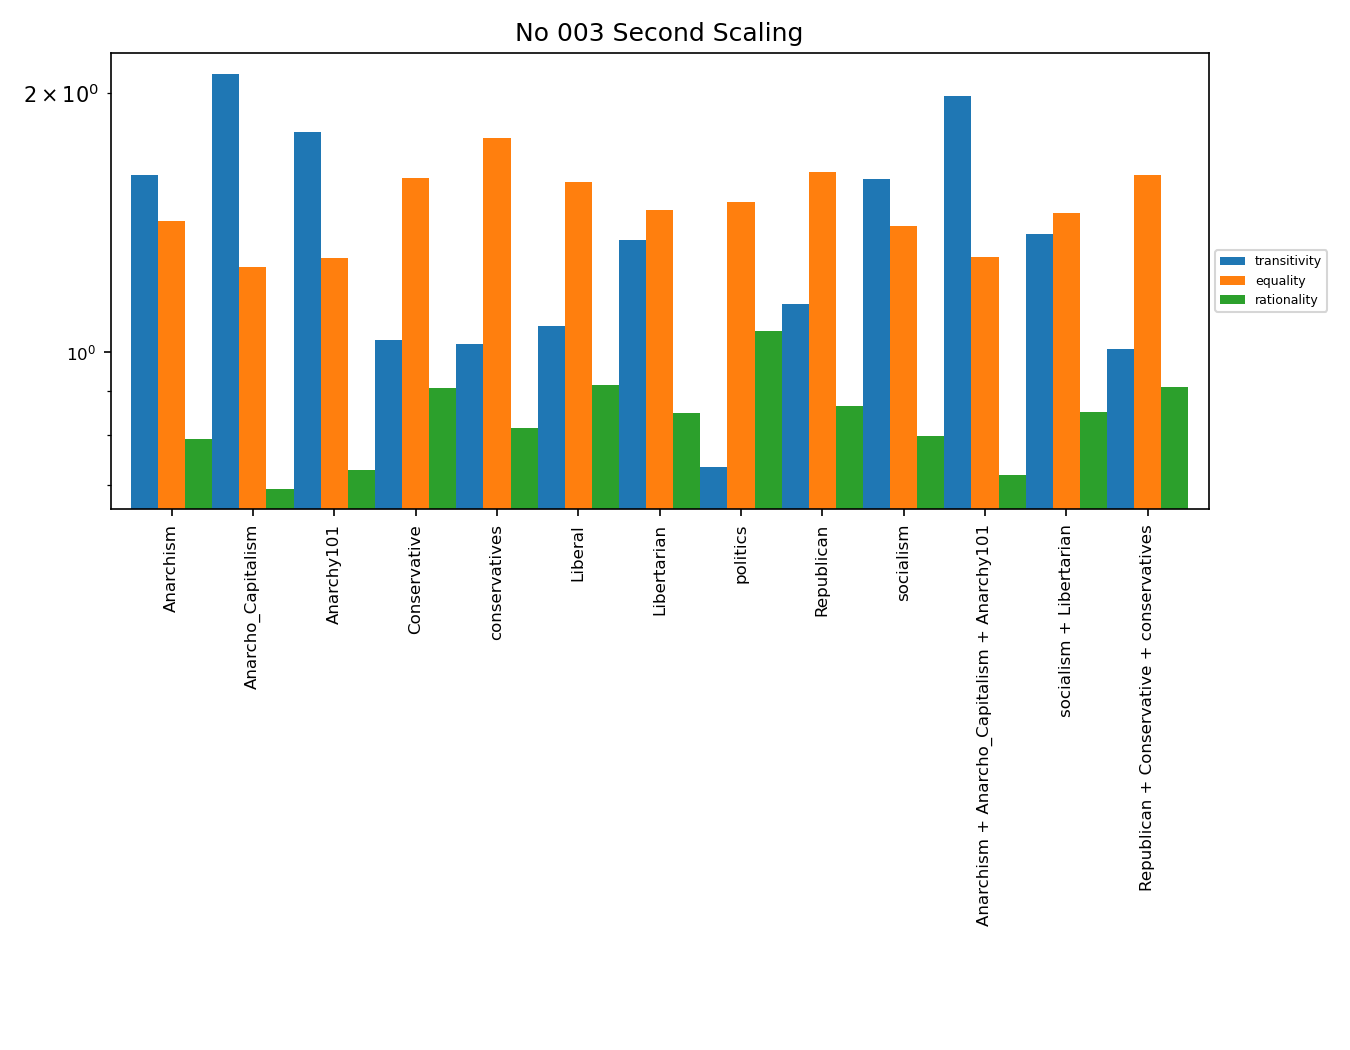

In [6]:
# without 003
scaling = df_omit.divide(df_omit.sum(axis=0), axis=1)
scaled = scaling.dot(dims_omit)
average = scaling.divide(scaling.sum(axis=1), axis=0).dot(dims_omit)

common.plot_df(scaled, 'No 003 Single Scaling', (9,7))
common.plot_df(average, 'No 003 Second Scaling', (9,7))

<IPython.core.display.Javascript object>


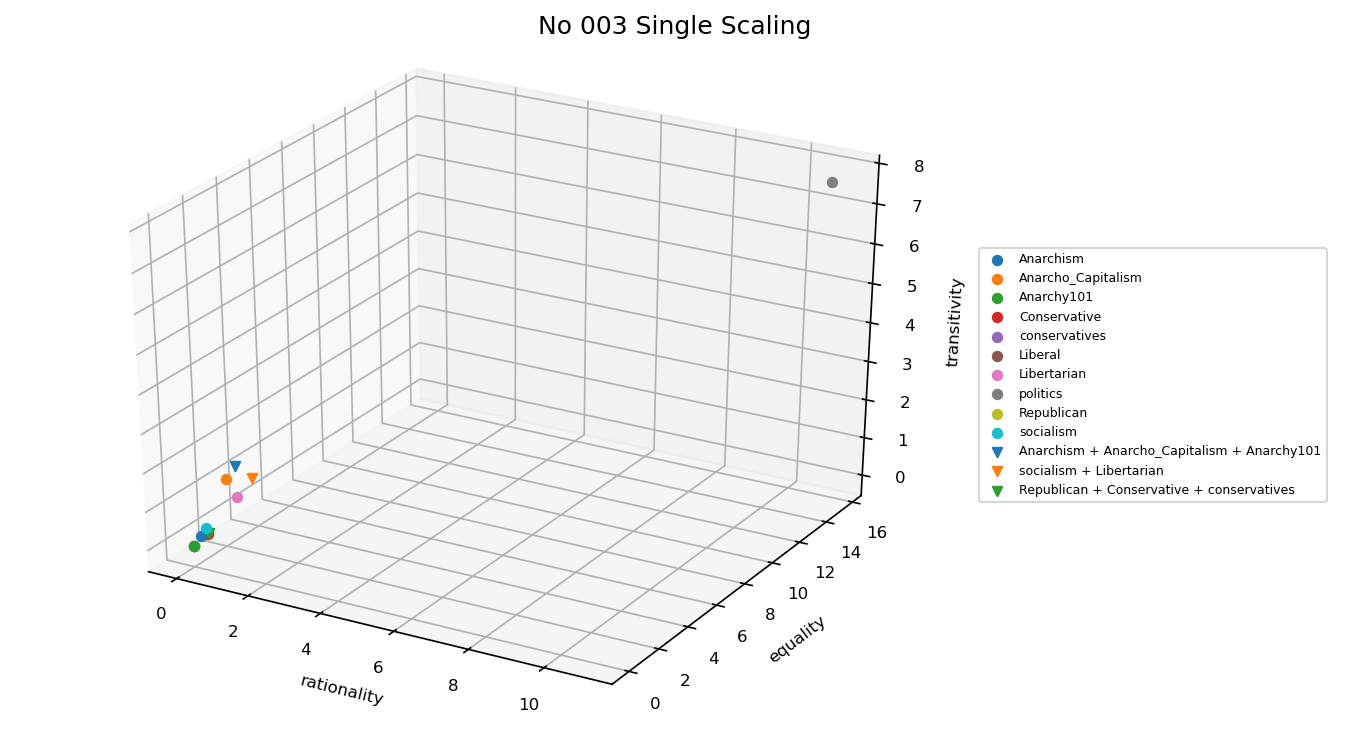

<IPython.core.display.Javascript object>


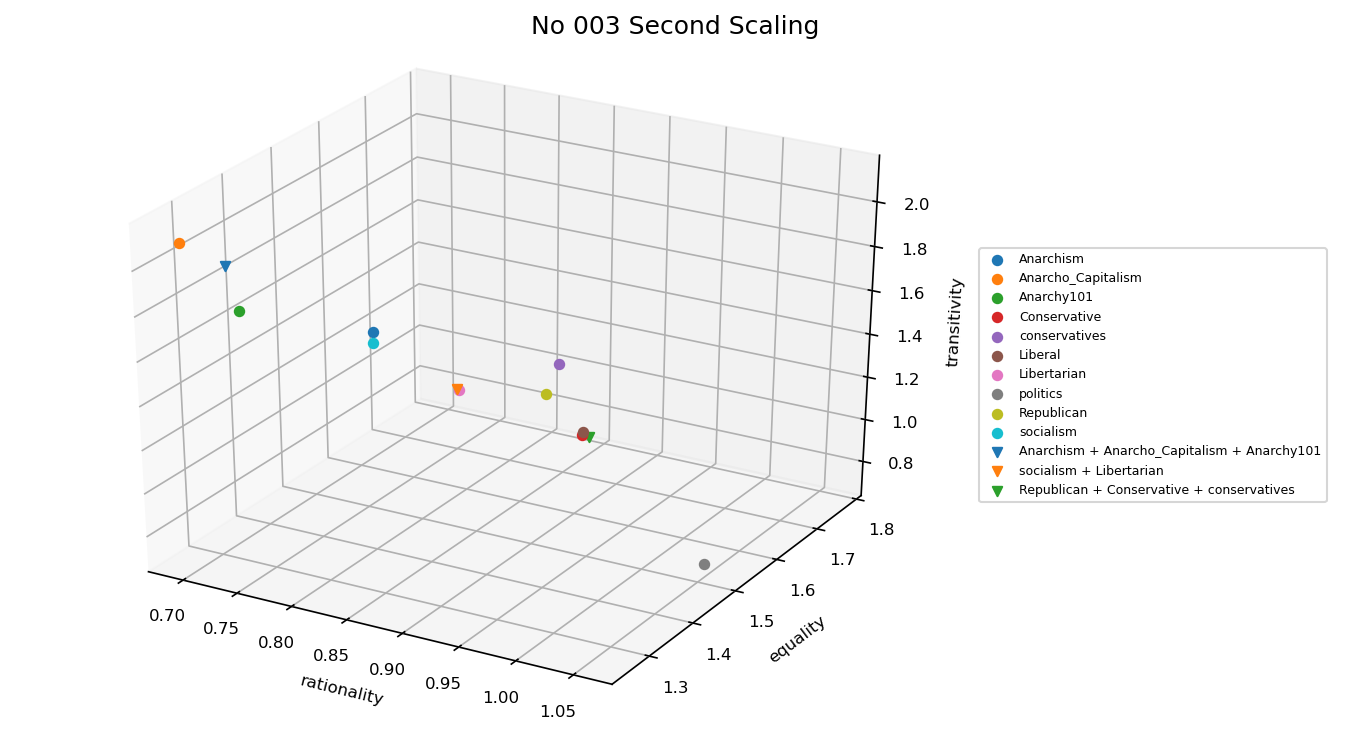

In [7]:
common.plot_3d(scaled, 'No 003 Single Scaling', 'rationality', 'equality', 'transitivity')
common.plot_3d(average, 'No 003 Second Scaling', 'rationality', 'equality', 'transitivity')

## Notes

* Todo: statistical significane (p-value)
* Dataset: William L. Hamilton*, Justine Zhang*, Cristian Danescu-Niculescu-Mizil, Dan Jurafsky, Jure Leskovec. Loyalty in Online Communities. (Currently under review at WWW 2017). *Equal contribution. http://snap.stanford.edu/data/web-RedditNetworks.html